In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy import stats

In [2]:
import sys
sys.path.append("./../Scripts/")
import inv_flux as invf

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [3]:
from importlib import reload

In [4]:
reload(invf)

<module 'inv_flux' from './../Scripts/inv_flux.py'>

In [5]:
fCAMS = pickle.load(open("./../Output/output_raw/output_all/CAMS_all/year.pik", "rb"))

# ModelEvaluation

In [6]:
CAMS = invf.ModelEvaluation(fCAMS)
CAMS.data

<xarray.Dataset>
Dimensions:         (time: 39)
Coordinates:
  * time            (time) object 1979-12-30 00:00:00 ... 2017-12-30 00:00:00
Data variables:
    Earth_Land      (time) float64 -0.3236 -0.2909 -1.424 ... -2.248 -3.845
    South_Land      (time) float64 -0.06017 0.09 0.05536 ... 0.08921 0.08088
    Tropical_Land   (time) float64 2.072 1.62 0.4356 ... 0.824 0.6507 -1.083
    North_Land      (time) float64 -2.335 -2.001 -1.915 ... -2.95 -2.988 -2.843
    Earth_Ocean     (time) float64 -1.054 -1.139 -1.101 ... -1.933 -2.067 -2.189
    South_Ocean     (time) float64 -0.9933 -1.133 -1.017 ... -1.448 -1.562
    Tropical_Ocean  (time) float64 0.8567 0.8374 0.8029 ... 0.4387 0.3609 0.3218
    North_Ocean     (time) float64 -0.9174 -0.8442 -0.8868 ... -0.9797 -0.9491

In [7]:
CAMS.time

DatetimeIndex(['1979-12-01', '1980-12-01', '1981-12-01', '1982-12-01',
               '1983-12-01', '1984-12-01', '1985-12-01', '1986-12-01',
               '1987-12-01', '1988-12-01', '1989-12-01', '1990-12-01',
               '1991-12-01', '1992-12-01', '1993-12-01', '1994-12-01',
               '1995-12-01', '1996-12-01', '1997-12-01', '1998-12-01',
               '1999-12-01', '2000-12-01', '2001-12-01', '2002-12-01',
               '2003-12-01', '2004-12-01', '2005-12-01', '2006-12-01',
               '2007-12-01', '2008-12-01', '2009-12-01', '2010-12-01',
               '2011-12-01', '2012-12-01', '2013-12-01', '2014-12-01',
               '2015-12-01', '2016-12-01', '2017-12-01'],
              dtype='datetime64[ns]', freq=None)

In [8]:
CAMS.GCP

,ocean,land (model),land,CO2
Year,,,,
1979,-1.295721,-1.536242,-0.557760,335.2860
1980,-1.648664,-0.519354,-1.124630,336.7320
1981,-1.607267,-2.274393,-2.177935,338.2020
1982,-1.674443,-1.554900,-2.396098,339.6900
1983,-1.828477,-0.216520,-0.482967,341.1940
1984,-1.748991,-2.832297,-2.053006,342.7120
1985,-1.690006,-2.640692,-1.460228,344.2390
1986,-1.788596,-2.251247,-2.836112,345.7710
1987,-1.812818,-0.317565,0.528994,347.3010


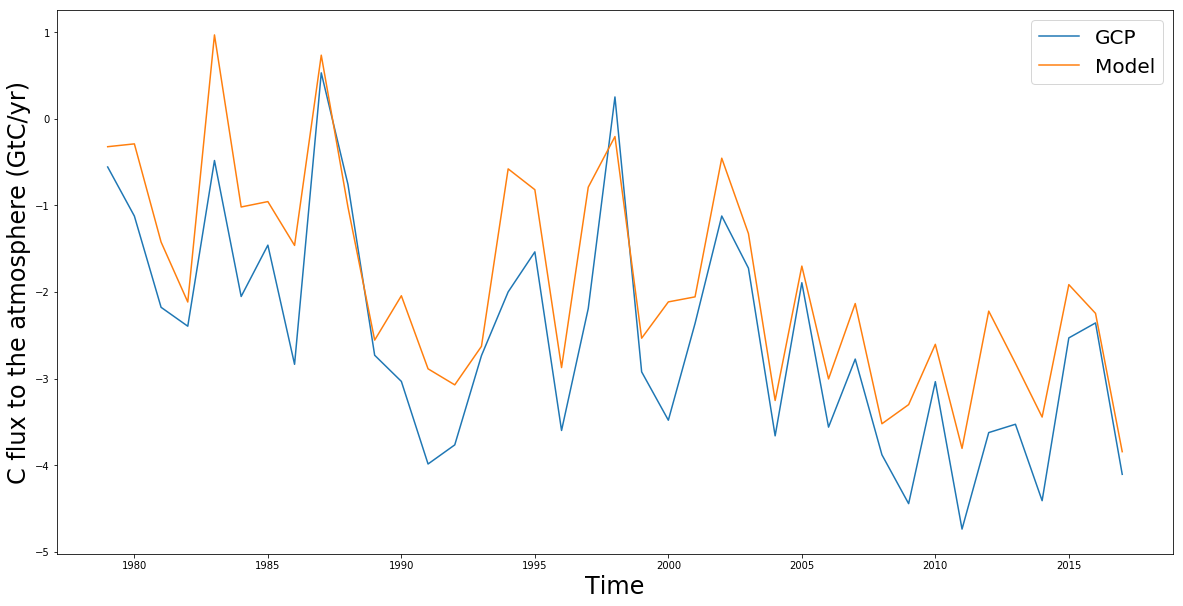

In [9]:
CAMS.plot_vs_GCP("land", "time")

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


LinregressResult(slope=0.8752340489957354, intercept=0.32806285939922675, rvalue=0.9306003663997316, pvalue=9.882157873949554e-18, stderr=0.056595891361134854)

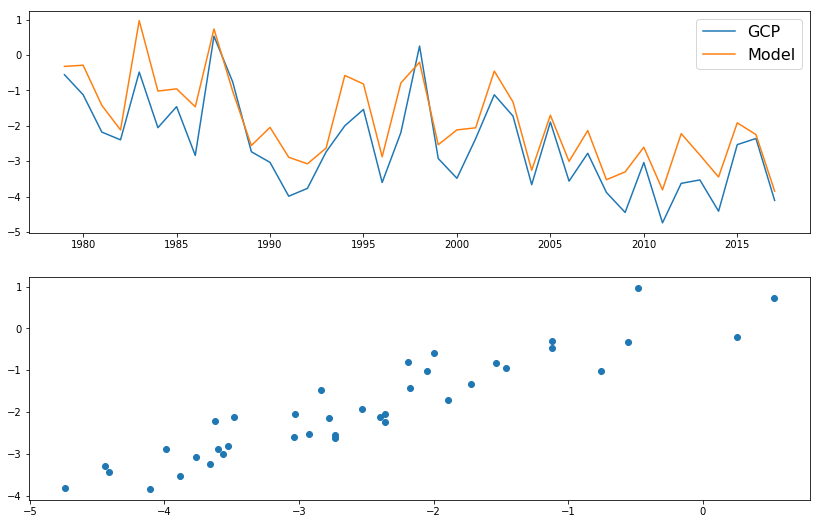

In [10]:
CAMS.regress_timeseries_to_GCP("land", plot=True)

GCP slope: -25.596 MtC/yr
Model slope: -23.429 MtC/yr
Percentage difference: 9.25%


{'GCP_slope (MtC/yr)': -25.596381471376514,
 'Model_slope (MtC/yr)': -23.42924329336258,
 '%_diff': 9.249714772597343}

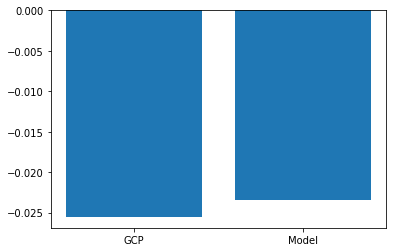

In [11]:
CAMS.compare_trend_to_GCP("ocean")

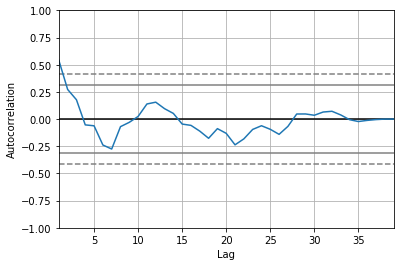

In [12]:
CAMS.autocorrelation_plot("North_Ocean")

NameError: name 'model_df' is not defined

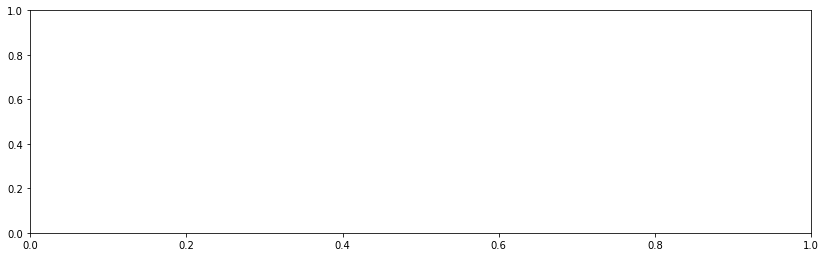

In [13]:
CAMS.regress_rolling_trend_to_GCP("land")

# Analysis

In [148]:
fmCAMS = pickle.load(open("./../Output/output_raw/output_all/CAMS_all/year.pik", "rb"))

In [153]:
reload(invf)

<module 'inv_flux' from './../Scripts/inv_flux.py'>

In [154]:
aCAMS = invf.Analysis(fmCAMS)
aCAMS.data

<xarray.Dataset>
Dimensions:         (time: 39)
Coordinates:
  * time            (time) object 1979-12-30 00:00:00 ... 2017-12-30 00:00:00
Data variables:
    Earth_Land      (time) float64 -0.3236 -0.2909 -1.424 ... -2.248 -3.845
    South_Land      (time) float64 -0.06017 0.09 0.05536 ... 0.08921 0.08088
    Tropical_Land   (time) float64 2.072 1.62 0.4356 ... 0.824 0.6507 -1.083
    North_Land      (time) float64 -2.335 -2.001 -1.915 ... -2.95 -2.988 -2.843
    Earth_Ocean     (time) float64 -1.054 -1.139 -1.101 ... -1.933 -2.067 -2.189
    South_Ocean     (time) float64 -0.9933 -1.133 -1.017 ... -1.448 -1.562
    Tropical_Ocean  (time) float64 0.8567 0.8374 0.8029 ... 0.4387 0.3609 0.3218
    North_Ocean     (time) float64 -0.9174 -0.8442 -0.8868 ... -0.9797 -0.9491

In [155]:
aCAMS.time

DatetimeIndex(['1979-12-01', '1980-12-01', '1981-12-01', '1982-12-01',
               '1983-12-01', '1984-12-01', '1985-12-01', '1986-12-01',
               '1987-12-01', '1988-12-01', '1989-12-01', '1990-12-01',
               '1991-12-01', '1992-12-01', '1993-12-01', '1994-12-01',
               '1995-12-01', '1996-12-01', '1997-12-01', '1998-12-01',
               '1999-12-01', '2000-12-01', '2001-12-01', '2002-12-01',
               '2003-12-01', '2004-12-01', '2005-12-01', '2006-12-01',
               '2007-12-01', '2008-12-01', '2009-12-01', '2010-12-01',
               '2011-12-01', '2012-12-01', '2013-12-01', '2014-12-01',
               '2015-12-01', '2016-12-01', '2017-12-01'],
              dtype='datetime64[ns]', freq=None)

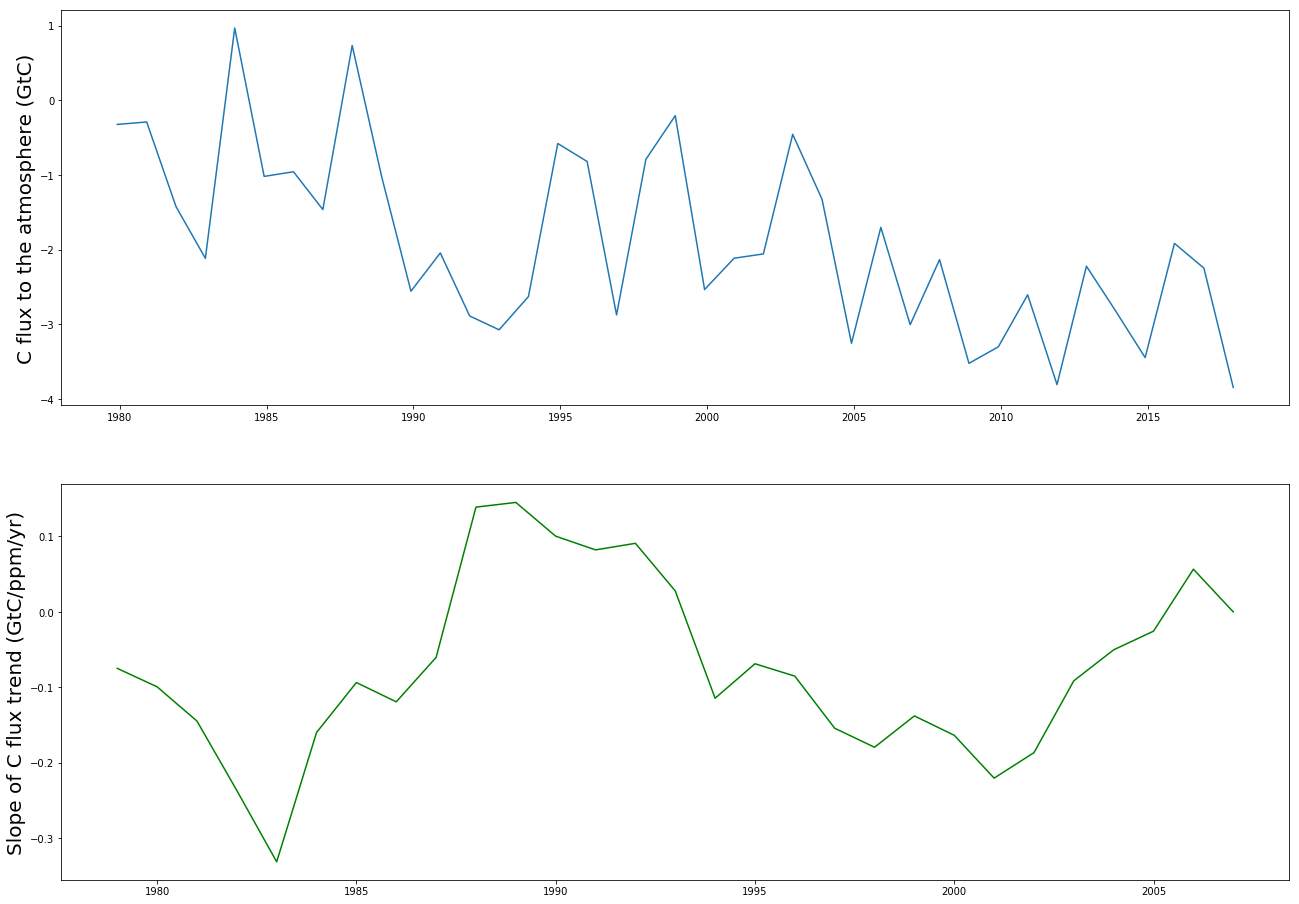

In [156]:
aCAMS.rolling_trend("Earth_Land", 10, True, True);

./../Scripts/inv_flux.py:288: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(1/freqs, spec)


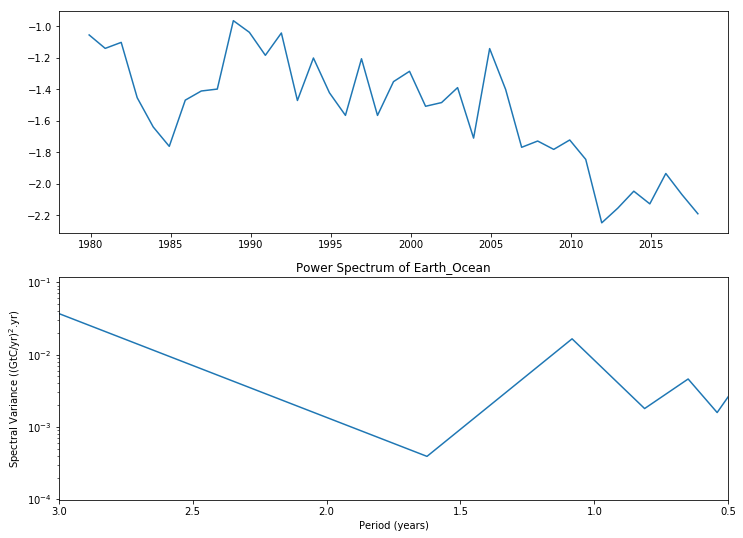

./../Scripts/inv_flux.py:298: RuntimeWarning: divide by zero encountered in true_divide
  return pd.DataFrame({f"Period{period}": 1/freqs, f"Spectral Variance {unit}": spec}, index=freqs)


,Period (years),Spectral Variance ((GtC/yr)$^2$.yr)
0.000000,inf,0.015612
0.307692,3.250000,0.084531
0.615385,1.625000,0.000392
0.923077,1.083333,0.016517
1.230769,0.812500,0.001795
1.538462,0.650000,0.004600
1.846154,0.541667,0.001582
2.153846,0.464286,0.004058
2.461538,0.406250,0.004531
2.769231,0.361111,0.002195


In [157]:
aCAMS.psd("Earth_Ocean", fs=12, xlim=[3,0.5], plot=True)

In [20]:
aCAMS.deseasonalise("Earth_Land")

IndexError: index 39 is out of bounds for axis 1 with size 39

In [21]:
plt.figure(figsize=(22,10))
plt.plot(aCAMS.time, aCAMS.deseasonalise("Earth_Land"))
plt.plot(aCAMS.time, aCAMS.bandpass("Earth_Land", 1/(10*12), deseasonalise_first=True))

IndexError: index 39 is out of bounds for axis 1 with size 39

<Figure size 1584x720 with 0 Axes>

# Rolling gradient functions

In [39]:
CAMS.data.time[0]

<xarray.DataArray 'time' ()>
array(cftime.Datetime360Day(1979, 12, 30, 0, 0, 0, 0, 3, 360), dtype=object)
Coordinates:
    time     object 1979-12-30 00:00:00

In [40]:
CAMS.data["Earth_Land"].sel(time=slice(CAMS.data.time[0], CAMS.data.time[0+10]))

<xarray.DataArray 'Earth_Land' (time: 11)>
array([-0.323608, -0.290874, -1.424122, -2.116814,  0.967107, -1.019621,
       -0.95732 , -1.463503,  0.733121, -1.02098 , -2.556591])
Coordinates:
  * time     (time) object 1979-12-30 00:00:00 ... 1989-12-30 00:00:00

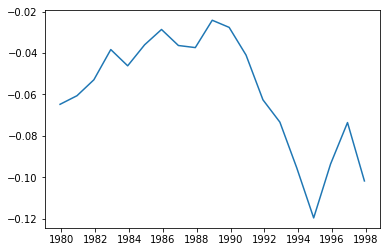

In [92]:
window_size = 20
roll_values = []
for i in range(0, len(CAMS.time) - window_size):
    timeCAMS = CAMS.time[i:i+window_size+1]
    subCAMS = CAMS.data["Earth_Land"].sel(time=slice(CAMS.data.time[i], CAMS.data.time[i+window_size])).values
    
    statsCAMS = stats.linregress(timeCAMS.year, subCAMS)
    
    roll_values.append(statsCAMS[0])
    
plt.plot(CAMS.time[:len(CAMS.time) - window_size], roll_values)

In [69]:
CAMS.data["Earth_Land"].sel(time=slice(CAMS.data.time[0], CAMS.data.time[0+10])).time.values

array([cftime.Datetime360Day(1979, 12, 30, 0, 0, 0, 0, 3, 360),
       cftime.Datetime360Day(1980, 12, 30, 0, 0, 0, 0, 6, 360),
       cftime.Datetime360Day(1981, 12, 30, 0, 0, 0, 0, 2, 360),
       cftime.Datetime360Day(1982, 12, 30, 0, 0, 0, 0, 5, 360),
       cftime.Datetime360Day(1983, 12, 30, 0, 0, 0, 0, 1, 360),
       cftime.Datetime360Day(1984, 12, 30, 0, 0, 0, 0, 4, 360),
       cftime.Datetime360Day(1985, 12, 30, 0, 0, 0, 0, 0, 360),
       cftime.Datetime360Day(1986, 12, 30, 0, 0, 0, 0, 3, 360),
       cftime.Datetime360Day(1987, 12, 30, 0, 0, 0, 0, 6, 360),
       cftime.Datetime360Day(1988, 12, 30, 0, 0, 0, 0, 2, 360),
       cftime.Datetime360Day(1989, 12, 30, 0, 0, 0, 0, 5, 360)],
      dtype=object)